In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("Data\\2019_full.csv")

In [3]:
for column in data.columns:
    if column == "Label": continue
    if "!!Total!!Estimate" not in column:
        data = data.drop(column, axis=1)
data

,Label,Alabama!!Total!!Estimate,Alaska!!Total!!Estimate,Arizona!!Total!!Estimate,Arkansas!!Total!!Estimate,California!!Total!!Estimate,Colorado!!Total!!Estimate,Connecticut!!Total!!Estimate,Delaware!!Total!!Estimate,District of Columbia!!Total!!Estimate,...,Tennessee!!Total!!Estimate,Texas!!Total!!Estimate,Utah!!Total!!Estimate,Vermont!!Total!!Estimate,Virginia!!Total!!Estimate,Washington!!Total!!Estimate,West Virginia!!Total!!Estimate,Wisconsin!!Total!!Estimate,Wyoming!!Total!!Estimate,Puerto Rico!!Total!!Estimate
0,Citizens 18 years and over,"3,731,336","533,151","5,137,474","2,235,415","26,032,160","4,244,210","2,619,474","725,178","536,768",...,"5,129,580","18,875,542","2,134,249","498,705","6,226,623","5,409,035","1,420,289","4,412,888","434,852","2,579,596"
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 to 29 years,"763,649","123,692","1,118,272","462,574","5,972,852","930,674","519,013","138,340","145,373",...,"1,064,681","4,434,869","577,652","101,619","1,300,940","1,119,528","260,574","880,737","90,057","516,634"
3,30 to 44 years,"875,096","144,125","1,186,802","527,303","6,498,394","1,139,013","558,494","153,789","173,776",...,"1,213,196","4,965,420","612,709","103,070","1,512,208","1,373,286","313,826","1,018,138","106,773","563,268"
4,45 to 64 years,"1,243,536","176,561","1,573,498","725,261","8,179,712","1,344,239","932,851","246,241","134,136",...,"1,722,862","5,961,275","585,098","169,970","2,088,765","1,744,732","479,807","1,503,592","139,611","825,956"
5,65 years and over,"849,055","88,773","1,258,902","520,277","5,381,202","830,284","609,116","186,808","83,483",...,"1,128,841","3,513,978","358,790","124,046","1,324,710","1,171,489","366,082","1,010,421","98,411","673,738"
6,SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Male,"1,768,386","278,479","2,533,931","1,075,762","12,786,049","2,128,648","1,253,707","344,221","249,106",...,"2,456,302","9,232,534","1,065,672","244,340","3,030,164","2,684,022","696,420","2,172,383","220,281","1,206,627"
8,Female,"1,962,950","254,672","2,603,543","1,159,653","13,246,111","2,115,562","1,365,767","380,957","287,662",...,"2,673,278","9,643,008","1,068,577","254,365","3,196,459","2,725,013","723,869","2,240,505","214,571","1,372,969"
9,RACE AND HISPANIC ORIGIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.dropna()
data.index = np.arange(len(data.index))
data

,Label,Alabama!!Total!!Estimate,Alaska!!Total!!Estimate,Arizona!!Total!!Estimate,Arkansas!!Total!!Estimate,California!!Total!!Estimate,Colorado!!Total!!Estimate,Connecticut!!Total!!Estimate,Delaware!!Total!!Estimate,District of Columbia!!Total!!Estimate,...,Tennessee!!Total!!Estimate,Texas!!Total!!Estimate,Utah!!Total!!Estimate,Vermont!!Total!!Estimate,Virginia!!Total!!Estimate,Washington!!Total!!Estimate,West Virginia!!Total!!Estimate,Wisconsin!!Total!!Estimate,Wyoming!!Total!!Estimate,Puerto Rico!!Total!!Estimate
0,Citizens 18 years and over,"3,731,336","533,151","5,137,474","2,235,415","26,032,160","4,244,210","2,619,474","725,178","536,768",...,"5,129,580","18,875,542","2,134,249","498,705","6,226,623","5,409,035","1,420,289","4,412,888","434,852","2,579,596"
1,18 to 29 years,"763,649","123,692","1,118,272","462,574","5,972,852","930,674","519,013","138,340","145,373",...,"1,064,681","4,434,869","577,652","101,619","1,300,940","1,119,528","260,574","880,737","90,057","516,634"
2,30 to 44 years,"875,096","144,125","1,186,802","527,303","6,498,394","1,139,013","558,494","153,789","173,776",...,"1,213,196","4,965,420","612,709","103,070","1,512,208","1,373,286","313,826","1,018,138","106,773","563,268"
3,45 to 64 years,"1,243,536","176,561","1,573,498","725,261","8,179,712","1,344,239","932,851","246,241","134,136",...,"1,722,862","5,961,275","585,098","169,970","2,088,765","1,744,732","479,807","1,503,592","139,611","825,956"
4,65 years and over,"849,055","88,773","1,258,902","520,277","5,381,202","830,284","609,116","186,808","83,483",...,"1,128,841","3,513,978","358,790","124,046","1,324,710","1,171,489","366,082","1,010,421","98,411","673,738"
5,Male,"1,768,386","278,479","2,533,931","1,075,762","12,786,049","2,128,648","1,253,707","344,221","249,106",...,"2,456,302","9,232,534","1,065,672","244,340","3,030,164","2,684,022","696,420","2,172,383","220,281","1,206,627"
6,Female,"1,962,950","254,672","2,603,543","1,159,653","13,246,111","2,115,562","1,365,767","380,957","287,662",...,"2,673,278","9,643,008","1,068,577","254,365","3,196,459","2,725,013","723,869","2,240,505","214,571","1,372,969"
7,White alone,"2,609,612","365,703","4,166,945","1,782,057","16,517,379","3,679,680","2,084,522","525,325","244,643",...,"4,094,840","14,273,222","1,937,546","476,833","4,396,643","4,356,305","1,337,522","3,914,318","404,270","1,683,468"
8,Black or African American alone,"996,812","17,746","240,721","345,456","1,744,654","169,652","276,252","157,024","243,233",...,"850,333","2,524,172","20,064","5,062","1,238,107","196,882","52,815","258,513",N,"319,052"
9,Asian alone,"34,017","26,683","127,073","24,055","3,714,094","109,532","86,316","18,037","20,690",...,"64,607","739,788","40,075","4,956","326,275","372,706","7,883","82,163",N,"3,130"


In [5]:
# Renaming columns
data.columns = (data.columns.str.replace("!!Total!!Estimate", ""))

In [6]:
def p2f(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [7]:
# converting all strings to float (if they arent a number they become 0)
for i in range(1, len(data.columns)):
    col = data.iloc[:, i].astype(str).str.replace('\D+', '').apply(p2f)
    data[data.columns[i]] = col

#removing as many 0 values as I can easily
data = data[data["Alabama"] > 0]    

<ipython-input-7-f5ce7bcde566>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[i]] = col


In [8]:
#discarding PR for electoral vote file
data = data.drop('Puerto Rico', axis = 1)

In [9]:
#reindexing again to organize 
data.index = np.arange(len(data.index))

In [10]:
#copies comes in because now I can create the expected array rn
copies = data.drop("Label", axis = 1)

#expected array
expected = copies.sum(axis=1) / copies.sum(axis = 1)[0] * 538

In [11]:
#now splitting up data on a per-capita basis
total_pop=data.iloc[0]

for i in range(1, len(data.columns)):
    col = data.iloc[:, i] / total_pop[i]
    data[data.columns[i]] = col

data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Citizens 18 years and over,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,18 to 29 years,0.204658,0.232002,0.217670,0.206930,0.229441,0.219281,0.198136,0.190767,0.270830,...,0.205841,0.207557,0.234953,0.270658,0.203766,0.208932,0.206974,0.183465,0.199583,0.207098
2,30 to 44 years,0.234526,0.270327,0.231009,0.235886,0.249629,0.268369,0.213208,0.212071,0.323745,...,0.239531,0.236510,0.263061,0.287084,0.206675,0.242862,0.253887,0.220959,0.230719,0.245539
3,45 to 64 years,0.333268,0.331165,0.306279,0.324441,0.314216,0.316723,0.356121,0.339559,0.249896,...,0.319796,0.335868,0.315820,0.274147,0.340823,0.335457,0.322559,0.337823,0.340727,0.321054
4,65 years and over,0.227547,0.166506,0.245043,0.232743,0.206714,0.195627,0.232534,0.257603,0.155529,...,0.234832,0.220065,0.186166,0.168111,0.248736,0.212749,0.216580,0.257752,0.228970,0.226309
5,Male,0.473928,0.522327,0.493225,0.481236,0.491164,0.501542,0.478610,0.474671,0.464085,...,0.501694,0.478851,0.489127,0.499319,0.489949,0.486646,0.496211,0.490337,0.492281,0.506565
6,Female,0.526072,0.477673,0.506775,0.518764,0.508836,0.498458,0.521390,0.525329,0.535915,...,0.498306,0.521149,0.510873,0.500681,0.510051,0.513354,0.503789,0.509663,0.507719,0.493435
7,White alone,0.699377,0.685928,0.811088,0.797193,0.634499,0.866988,0.795779,0.724408,0.455770,...,0.880893,0.798280,0.756175,0.907835,0.956142,0.706104,0.805376,0.941725,0.887020,0.929673
8,Black or African American alone,0.267146,0.033285,0.046856,0.154538,0.067019,0.039973,0.105461,0.216532,0.453144,...,0.014852,0.165770,0.133727,0.009401,0.010150,0.198841,0.036399,0.037186,0.058581,0.000000
9,Asian alone,0.009117,0.050048,0.024735,0.010761,0.142673,0.025807,0.032952,0.024873,0.038546,...,0.009080,0.012595,0.039193,0.018777,0.009938,0.052400,0.068904,0.005550,0.018619,0.000000


In [12]:
electorals = pd.read_csv("Data\state_data")
diaspora = electorals["E.C. Votes"] 

for i in range(1, len(data.columns)):
    col = data.iloc[:, i] * diaspora[i-1]
    data[data.columns[i]] = col
data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Citizens 18 years and over,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,...,3.000000,11.000000,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000
1,18 to 29 years,1.841925,0.696005,2.394366,1.241579,12.619270,1.973528,1.386954,0.572301,0.812491,...,0.617522,2.283129,8.928222,1.623949,0.611297,2.716114,2.483684,0.917327,1.995829,0.621294
2,30 to 44 years,2.110736,0.810980,2.541097,1.415316,13.729620,2.415318,1.492459,0.636212,0.971235,...,0.718592,2.601608,9.996320,1.722505,0.620026,3.157202,3.046649,1.104796,2.307192,0.736616
3,45 to 64 years,2.999415,0.993495,3.369064,1.946648,17.281861,2.850507,2.492850,1.018678,0.749687,...,0.959389,3.694548,12.001163,1.644882,1.022468,4.360943,3.870706,1.689117,3.407274,0.963162
4,65 years and over,2.047925,0.499519,2.695473,1.396457,11.369249,1.760647,1.627736,0.772809,0.466587,...,0.704497,2.420715,7.074296,1.008664,0.746209,2.765742,2.598960,1.288759,2.289705,0.678928
5,Male,4.265355,1.566980,5.425476,2.887416,27.013997,4.513875,3.350271,1.424013,1.392255,...,1.505083,5.267356,18.586819,2.995917,1.469847,6.326404,5.954531,2.451684,4.922815,1.519696
6,Female,4.734645,1.433020,5.574524,3.112584,27.986003,4.486125,3.649729,1.575987,1.607745,...,1.494917,5.732644,19.413181,3.004083,1.530153,6.673596,6.045469,2.548316,5.077185,1.480304
7,White alone,6.294396,2.057783,8.921971,4.783157,34.897444,7.802894,5.570452,2.173225,1.367311,...,2.642678,8.781078,28.734668,5.447010,2.868427,9.179351,9.664508,4.708626,8.870196,2.789018
8,Black or African American alone,2.404315,0.099855,0.515415,0.927226,3.686055,0.359753,0.738226,0.649595,1.359431,...,0.044555,1.823475,5.081631,0.056406,0.030451,2.584931,0.436785,0.185930,0.585814,0.000000
9,Asian alone,0.082049,0.150143,0.272080,0.064565,7.847031,0.232267,0.230662,0.074618,0.115637,...,0.027241,0.138545,1.489332,0.112663,0.029813,0.681200,0.826852,0.027751,0.186189,0.000000


In [13]:
#isolate the list of states to perform arithmetic on
states = list(data)
states.remove("Label")
data[states]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,29.000000,...,3.000000,11.000000,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000
1,1.841925,0.696005,2.394366,1.241579,12.619270,1.973528,1.386954,0.572301,0.812491,5.316579,...,0.617522,2.283129,8.928222,1.623949,0.611297,2.716114,2.483684,0.917327,1.995829,0.621294
2,2.110736,0.810980,2.541097,1.415316,13.729620,2.415318,1.492459,0.636212,0.971235,6.263966,...,0.718592,2.601608,9.996320,1.722505,0.620026,3.157202,3.046649,1.104796,2.307192,0.736616
3,2.999415,0.993495,3.369064,1.946648,17.281861,2.850507,2.492850,1.018678,0.749687,9.415153,...,0.959389,3.694548,12.001163,1.644882,1.022468,4.360943,3.870706,1.689117,3.407274,0.963162
4,2.047925,0.499519,2.695473,1.396457,11.369249,1.760647,1.627736,0.772809,0.466587,8.004301,...,0.704497,2.420715,7.074296,1.008664,0.746209,2.765742,2.598960,1.288759,2.289705,0.678928
5,4.265355,1.566980,5.425476,2.887416,27.013997,4.513875,3.350271,1.424013,1.392255,13.950041,...,1.505083,5.267356,18.586819,2.995917,1.469847,6.326404,5.954531,2.451684,4.922815,1.519696
6,4.734645,1.433020,5.574524,3.112584,27.986003,4.486125,3.649729,1.575987,1.607745,15.049959,...,1.494917,5.732644,19.413181,3.004083,1.530153,6.673596,6.045469,2.548316,5.077185,1.480304
7,6.294396,2.057783,8.921971,4.783157,34.897444,7.802894,5.570452,2.173225,1.367311,22.568368,...,2.642678,8.781078,28.734668,5.447010,2.868427,9.179351,9.664508,4.708626,8.870196,2.789018
8,2.404315,0.099855,0.515415,0.927226,3.686055,0.359753,0.738226,0.649595,1.359431,4.358617,...,0.044555,1.823475,5.081631,0.056406,0.030451,2.584931,0.436785,0.185930,0.585814,0.000000
9,0.082049,0.150143,0.272080,0.064565,7.847031,0.232267,0.230662,0.074618,0.115637,0.658644,...,0.027241,0.138545,1.489332,0.112663,0.029813,0.681200,0.826852,0.027751,0.186189,0.000000


In [14]:
data["Expected"] = expected
data["Actual"] = data[states].sum(axis=1)
data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Expected,Actual
0,Citizens 18 years and over,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,...,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000,538.000000,538.000000
1,18 to 29 years,1.841925,0.696005,2.394366,1.241579,12.619270,1.973528,1.386954,0.572301,0.812491,...,8.928222,1.623949,0.611297,2.716114,2.483684,0.917327,1.995829,0.621294,113.245809,113.302263
2,30 to 44 years,2.110736,0.810980,2.541097,1.415316,13.729620,2.415318,1.492459,0.636212,0.971235,...,9.996320,1.722505,0.620026,3.157202,3.046649,1.104796,2.307192,0.736616,128.674880,128.779645
3,45 to 64 years,2.999415,0.993495,3.369064,1.946648,17.281861,2.850507,2.492850,1.018678,0.749687,...,12.001163,1.644882,1.022468,4.360943,3.870706,1.689117,3.407274,0.963162,176.531721,176.386966
4,65 years and over,2.047925,0.499519,2.695473,1.396457,11.369249,1.760647,1.627736,0.772809,0.466587,...,7.074296,1.008664,0.746209,2.765742,2.598960,1.288759,2.289705,0.678928,119.547591,119.531126
5,Male,4.265355,1.566980,5.425476,2.887416,27.013997,4.513875,3.350271,1.424013,1.392255,...,18.586819,2.995917,1.469847,6.326404,5.954531,2.451684,4.922815,1.519696,260.994235,261.262645
6,Female,4.734645,1.433020,5.574524,3.112584,27.986003,4.486125,3.649729,1.575987,1.607745,...,19.413181,3.004083,1.530153,6.673596,6.045469,2.548316,5.077185,1.480304,277.005765,276.737355
7,White alone,6.294396,2.057783,8.921971,4.783157,34.897444,7.802894,5.570452,2.173225,1.367311,...,28.734668,5.447010,2.868427,9.179351,9.664508,4.708626,8.870196,2.789018,408.077320,409.922544
8,Black or African American alone,2.404315,0.099855,0.515415,0.927226,3.686055,0.359753,0.738226,0.649595,1.359431,...,5.081631,0.056406,0.030451,2.584931,0.436785,0.185930,0.585814,0.000000,69.177130,67.080815
9,Asian alone,0.082049,0.150143,0.272080,0.064565,7.847031,0.232267,0.230662,0.074618,0.115637,...,1.489332,0.112663,0.029813,0.681200,0.826852,0.027751,0.186189,0.000000,24.383952,24.111491


In [20]:
eva = pd.DataFrame({
    "Label": data.Label,
    "Delta": data.Actual - data.Expected
})
eva

,Label,Delta
0,Citizens 18 years and over,0.000000
1,18 to 29 years,0.056454
2,30 to 44 years,0.104765
3,45 to 64 years,-0.144754
4,65 years and over,-0.016465
5,Male,0.268410
6,Female,-0.268410
7,White alone,1.845224
8,Black or African American alone,-2.096316
9,Asian alone,-0.272461


Text(0.5, 0, 'Race')

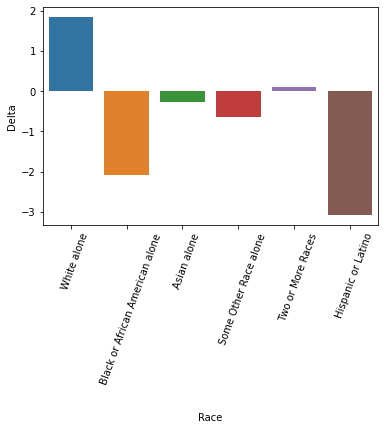

In [28]:
ax = sns.barplot(x=eva.Label[7:13], y=eva.Delta[7:13])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_xlabel("Race")